# Rainfall Prediction Project - Week 1
## Time Series Exploration and Analysis

**Project Goal:** Predict rainfall in Australian cities  
**This Week's Tasks:**
1. Time series visualization (0.5p)
2. Time series decomposition (0.5p)
3. Autocorrelation analysis (0.5p)
4. Data partitioning plan (0.5p)

**Dataset:** Australian Weather Data from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)

## 1. Load Dataset

Read the data from csv file

In [2]:
df = pd.read_csv('weatherAUS.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 2. Initial Data Exploration

In [3]:
print("="*80)
print("DATASET INFORMATION")
print("="*80)
print(f"Dataset dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique locations: {df['Location'].nunique()}")
print(f"Locations: {sorted(df['Location'].unique())}")

DATASET INFORMATION
Dataset dimensions: 145460 rows × 23 columns
Date range: 2007-11-01 to 2017-06-25
Unique locations: 49
Locations: ['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']


In [4]:
print("Missing Values Analysis:")
missing_df = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100)
}).sort_values('Percentage', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0])

Missing Values Analysis:
               Missing_Count  Percentage
Sunshine               69835   48.009762
Evaporation            62790   43.166506
Cloud3pm               59358   40.807095
Cloud9am               55888   38.421559
Pressure9am            15065   10.356799
Pressure3pm            15028   10.331363
WindDir9am             10566    7.263853
WindGustDir            10326    7.098859
WindGustSpeed          10263    7.055548
Humidity3pm             4507    3.098446
WindDir3pm              4228    2.906641
Temp3pm                 3609    2.481094
RainTomorrow            3267    2.245978
Rainfall                3261    2.241853
RainToday               3261    2.241853
WindSpeed3pm            3062    2.105046
Humidity9am             2654    1.824557
WindSpeed9am            1767    1.214767
Temp9am                 1767    1.214767
MinTemp                 1485    1.020899
MaxTemp                 1261    0.866905


In [5]:
print("Target Variable Distribution:")
print(df['RainTomorrow'].value_counts())
print(f"\nRain percentage: {df['RainTomorrow'].value_counts(normalize=True)['Yes']*100:.2f}%")

Target Variable Distribution:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Rain percentage: 22.42%


## 3. Select City for Analysis

Choose a city to analyze. Options: Sydney, Melbourne, Brisbane, Perth, Adelaide, Albury, etc.

In [6]:
CITY = 'Sydney'

df_city = df[df['Location'] == CITY].copy()
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city = df_city.sort_values('Date').reset_index(drop=True)
df_city.set_index('Date', inplace=True)

print(f"City: {CITY}")
print(f"Data points: {len(df_city)}")
print(f"Date range: {df_city.index.min()} to {df_city.index.max()}")
print(f"Missing rainfall values: {df_city['Rainfall'].isnull().sum()}")

City: Sydney
Data points: 3344
Date range: 2008-02-01 00:00:00 to 2017-06-25 00:00:00
Missing rainfall values: 7


---
# TASK 1: Time Series Visualization (0.5p)
---

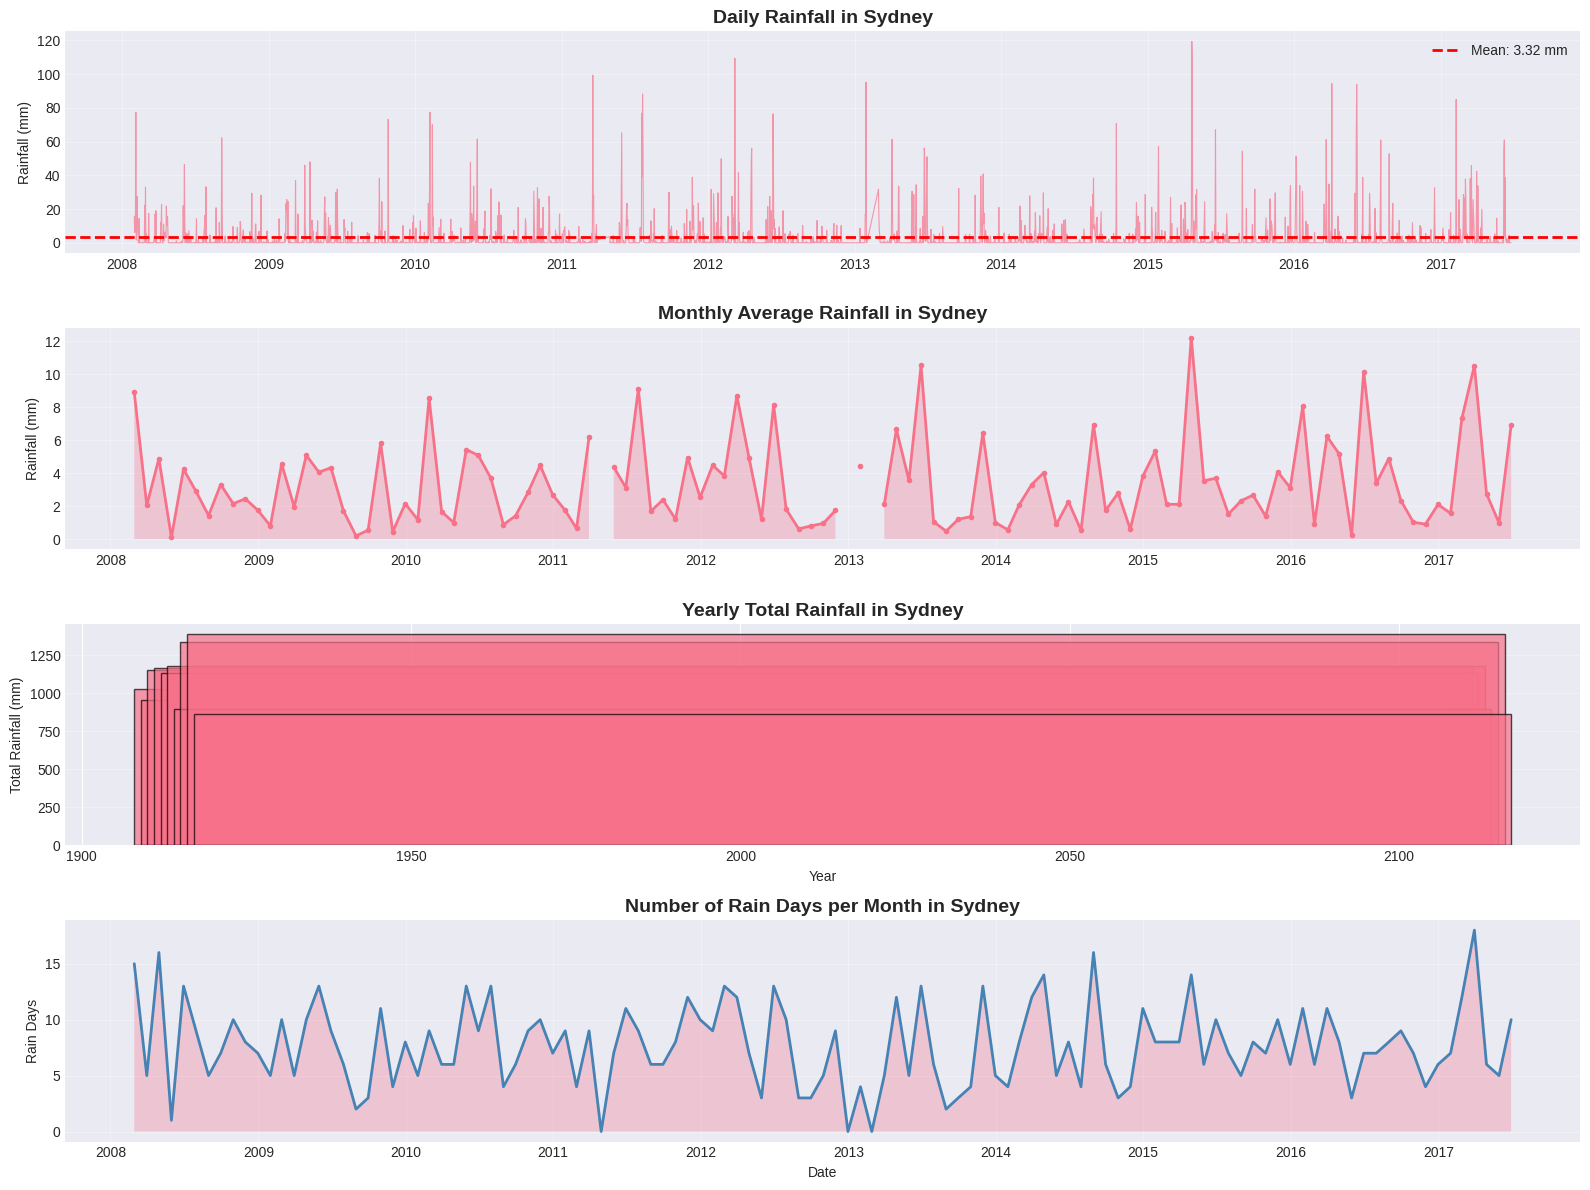

In [7]:
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

axes[0].plot(df_city.index, df_city['Rainfall'], linewidth=0.8, alpha=0.7)
axes[0].set_title(f'Daily Rainfall in {CITY}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Rainfall (mm)')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=df_city['Rainfall'].mean(), color='r', linestyle='--',
                label=f'Mean: {df_city["Rainfall"].mean():.2f} mm', linewidth=2)
axes[0].legend()

monthly_rainfall = df_city['Rainfall'].resample('M').mean()
axes[1].plot(monthly_rainfall.index, monthly_rainfall, linewidth=2, marker='o', markersize=3)
axes[1].set_title(f'Monthly Average Rainfall in {CITY}', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Rainfall (mm)')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(monthly_rainfall.index, monthly_rainfall, alpha=0.3)

yearly_rainfall = df_city['Rainfall'].resample('Y').sum()
axes[2].bar(yearly_rainfall.index.year, yearly_rainfall, width=200, alpha=0.7, edgecolor='black')
axes[2].set_title(f'Yearly Total Rainfall in {CITY}', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Total Rainfall (mm)')
axes[2].set_xlabel('Year')
axes[2].grid(True, alpha=0.3, axis='y')

df_city['RainDay'] = (df_city['Rainfall'] > 1).astype(int)
rain_days_monthly = df_city['RainDay'].resample('M').sum()
axes[3].plot(rain_days_monthly.index, rain_days_monthly, linewidth=2, color='steelblue')
axes[3].set_title(f'Number of Rain Days per Month in {CITY}', fontsize=14, fontweight='bold')
axes[3].set_ylabel('Rain Days')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)
axes[3].fill_between(rain_days_monthly.index, rain_days_monthly, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_timeseries_overview.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
print("Rainfall Statistics:")
print(df_city['Rainfall'].describe())

Rainfall Statistics:
count    3337.000000
mean        3.324543
std         9.887184
min         0.000000
25%         0.000000
50%         0.000000
75%         1.400000
max       119.400000
Name: Rainfall, dtype: float64


### Seasonal Patterns Analysis

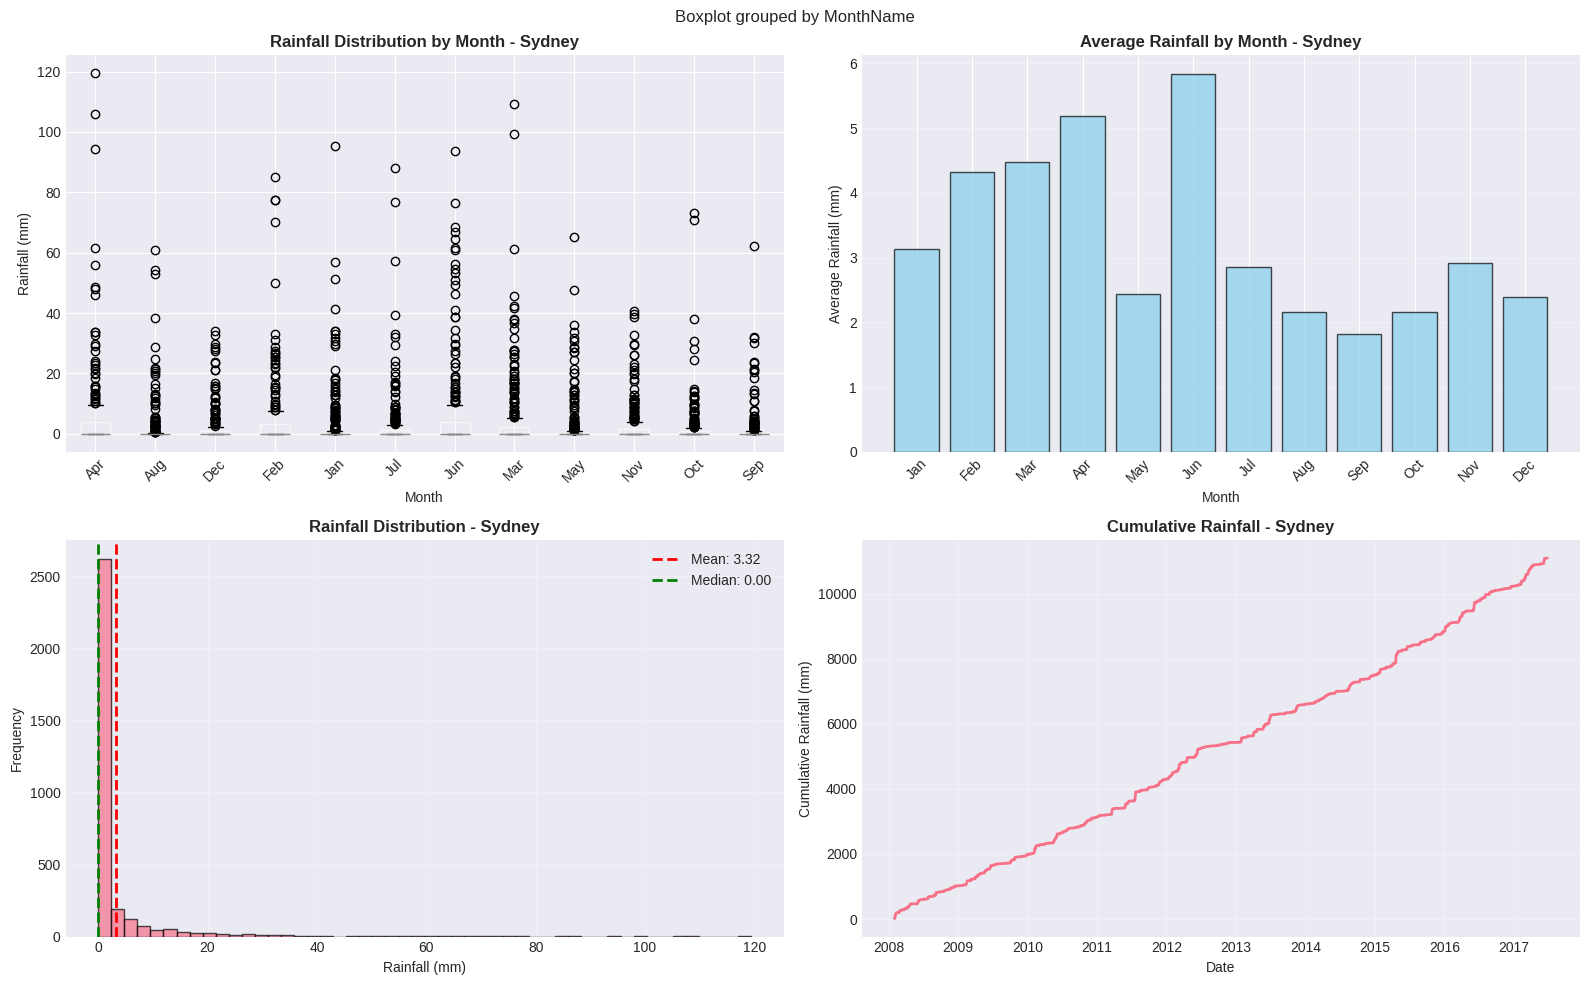

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df_city['Month'] = df_city.index.month
df_city['Year'] = df_city.index.year
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_city['MonthName'] = df_city.index.month.map(dict(enumerate(month_names, 1)))

df_city.boxplot(column='Rainfall', by='MonthName', ax=axes[0, 0])
axes[0, 0].set_title(f'Rainfall Distribution by Month - {CITY}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Rainfall (mm)')
plt.sca(axes[0, 0])
plt.xticks(rotation=45)

monthly_avg = df_city.groupby('Month')['Rainfall'].mean()
axes[0, 1].bar(range(1, 13), monthly_avg, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title(f'Average Rainfall by Month - {CITY}', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Rainfall (mm)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names, rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

axes[1, 0].hist(df_city['Rainfall'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title(f'Rainfall Distribution - {CITY}', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Rainfall (mm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df_city['Rainfall'].mean(), color='r', linestyle='--',
                   linewidth=2, label=f'Mean: {df_city["Rainfall"].mean():.2f}')
axes[1, 0].axvline(df_city['Rainfall'].median(), color='g', linestyle='--',
                   linewidth=2, label=f'Median: {df_city["Rainfall"].median():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

df_city['CumulativeRainfall'] = df_city['Rainfall'].cumsum()
axes[1, 1].plot(df_city.index, df_city['CumulativeRainfall'], linewidth=2)
axes[1, 1].set_title(f'Cumulative Rainfall - {CITY}', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Cumulative Rainfall (mm)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

---
# TASK 2: Time Series Decomposition (0.5p)
---

In [10]:
rainfall_monthly = df_city['Rainfall'].resample('M').mean().fillna(method='ffill')

print(f"Monthly data points: {len(rainfall_monthly)}")
print(f"Date range: {rainfall_monthly.index.min()} to {rainfall_monthly.index.max()}")

Monthly data points: 113
Date range: 2008-02-29 00:00:00 to 2017-06-30 00:00:00


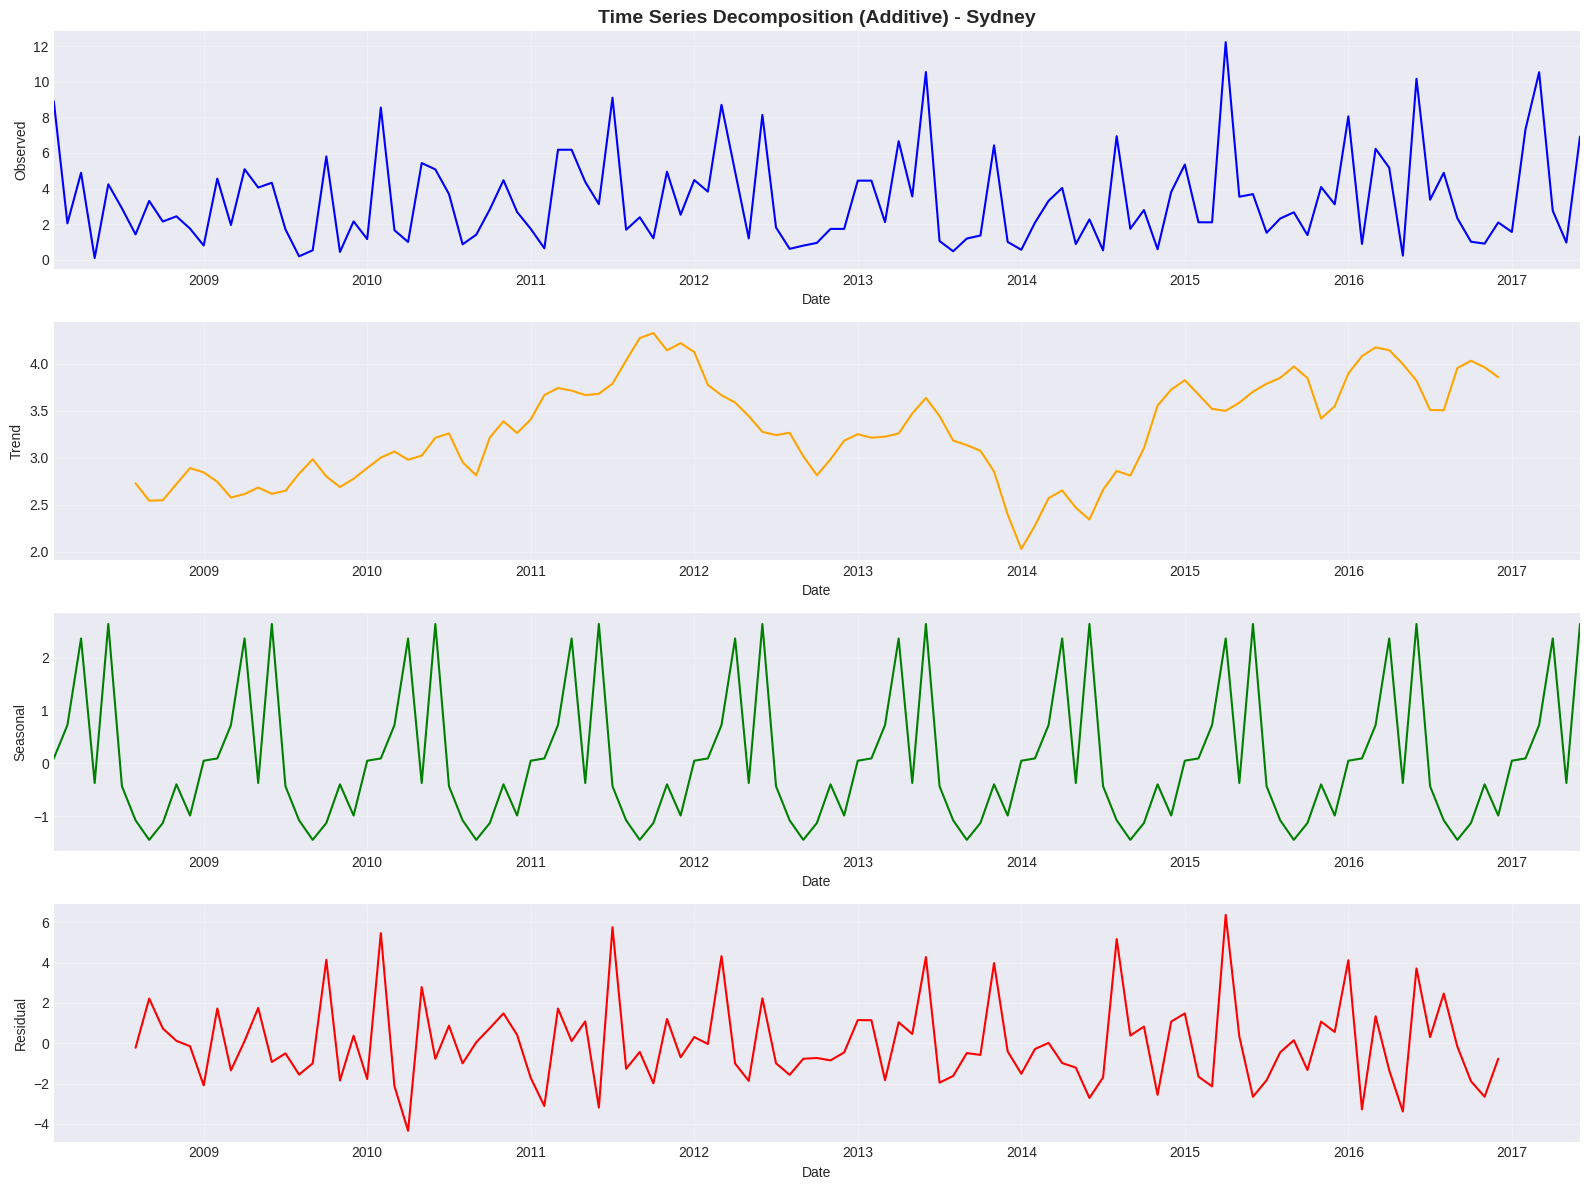

In [11]:
decomposition_add = seasonal_decompose(rainfall_monthly, model='additive', period=12)

fig, axes = plt.subplots(4, 1, figsize=(16, 12))

decomposition_add.observed.plot(ax=axes[0], color='blue')
axes[0].set_ylabel('Observed')
axes[0].set_title(f'Time Series Decomposition (Additive) - {CITY}', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

decomposition_add.trend.plot(ax=axes[1], color='orange')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

decomposition_add.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

decomposition_add.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_decomposition_additive.png', dpi=300, bbox_inches='tight')
plt.show()

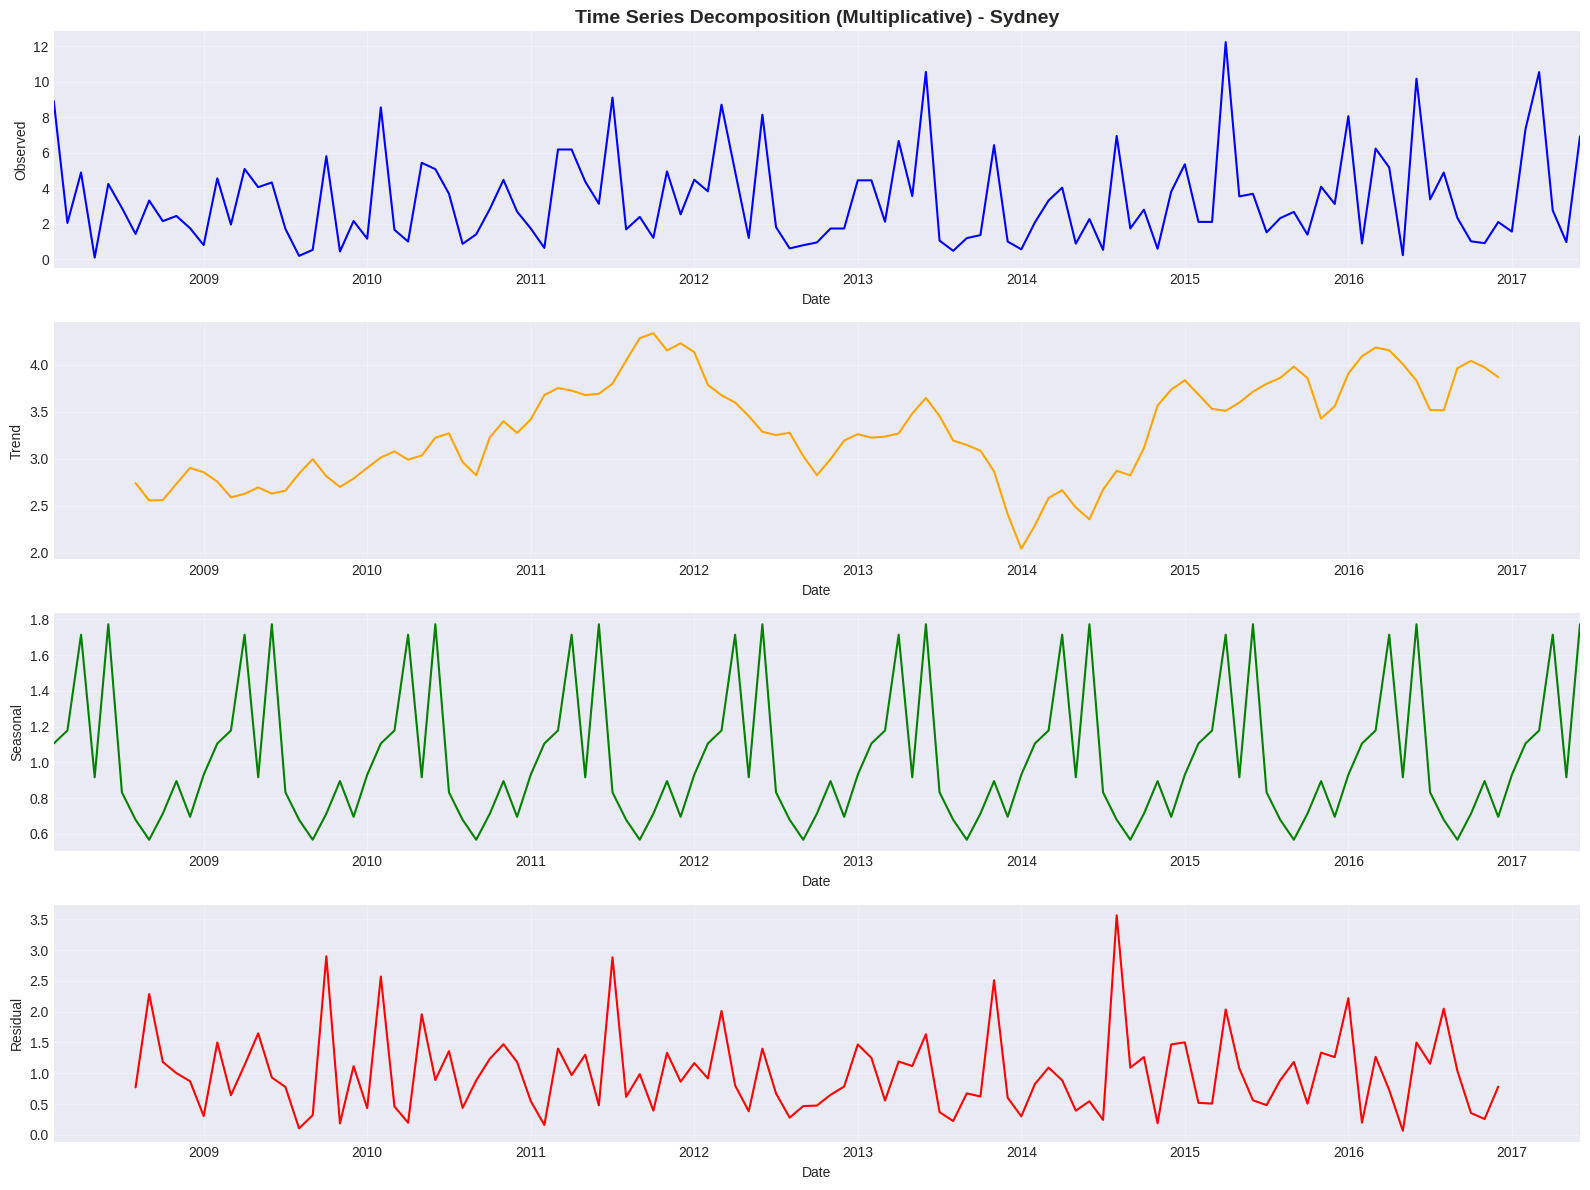

In [12]:
rainfall_monthly_mult = rainfall_monthly + 0.01
decomposition_mult = seasonal_decompose(rainfall_monthly_mult, model='multiplicative', period=12)

fig, axes = plt.subplots(4, 1, figsize=(16, 12))

decomposition_mult.observed.plot(ax=axes[0], color='blue')
axes[0].set_ylabel('Observed')
axes[0].set_title(f'Time Series Decomposition (Multiplicative) - {CITY}', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

decomposition_mult.trend.plot(ax=axes[1], color='orange')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

decomposition_mult.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

decomposition_mult.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_decomposition_multiplicative.png', dpi=300, bbox_inches='tight')
plt.show()

### Decomposition Analysis

In [13]:
print("DECOMPOSITION ANALYSIS (Additive Model)")
print("="*60)
print(f"\nTrend component:")
print(f"  Mean: {decomposition_add.trend.mean():.4f}")
print(f"  Std: {decomposition_add.trend.std():.4f}")
print(f"\nSeasonal component:")
print(f"  Mean: {decomposition_add.seasonal.mean():.4f}")
print(f"  Range: [{decomposition_add.seasonal.min():.4f}, {decomposition_add.seasonal.max():.4f}]")
print(f"\nResidual component:")
print(f"  Mean: {decomposition_add.resid.mean():.4f}")
print(f"  Std: {decomposition_add.resid.std():.4f}")

var_resid = np.var(decomposition_add.resid.dropna())
var_trend_resid = np.var(decomposition_add.trend.dropna() + decomposition_add.resid.dropna())
var_seasonal_resid = np.var(decomposition_add.seasonal.dropna() + decomposition_add.resid.dropna())

strength_trend = max(0, 1 - var_resid / var_trend_resid)
strength_seasonal = max(0, 1 - var_resid / var_seasonal_resid)

print(f"\nStrength of Trend: {strength_trend:.4f}")
print(f"Strength of Seasonality: {strength_seasonal:.4f}")

DECOMPOSITION ANALYSIS (Additive Model)

Trend component:
  Mean: 3.2951
  Std: 0.5315

Seasonal component:
  Mean: 0.0482
  Range: [-1.4519, 2.6391]

Residual component:
  Mean: -0.0093
  Std: 2.1222

Strength of Trend: 0.0575
Strength of Seasonality: 0.2602


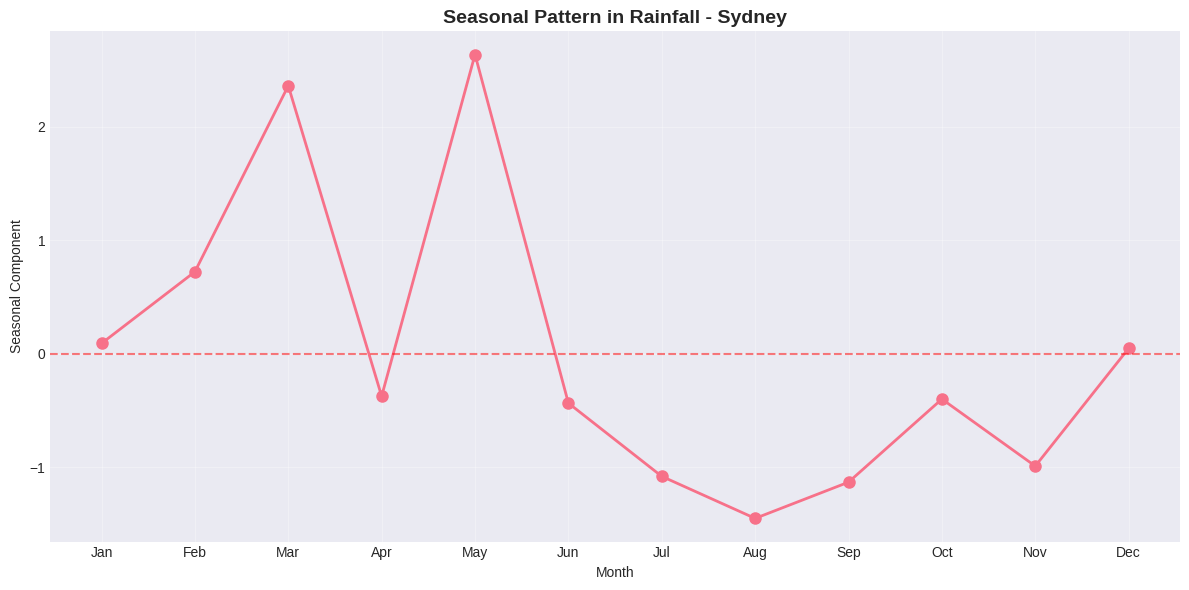

Seasonal Pattern by Month:
Jan:  0.0913
Feb:  0.7233
Mar:  2.3638
Apr: -0.3744
May:  2.6391
Jun: -0.4353
Jul: -1.0812
Aug: -1.4519
Sep: -1.1325
Oct: -0.3995
Nov: -0.9907
Dec:  0.0479


In [14]:
seasonal_pattern = decomposition_add.seasonal[:12]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
plt.plot(range(1, 13), seasonal_pattern.values, marker='o', linewidth=2, markersize=8)
plt.title(f'Seasonal Pattern in Rainfall - {CITY}', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Seasonal Component')
plt.xticks(range(1, 13), months)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f'{CITY}_seasonal_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

print("Seasonal Pattern by Month:")
for i, month in enumerate(months):
    print(f"{month}: {seasonal_pattern.values[i]:>7.4f}")

---
# TASK 3: Autocorrelation Analysis (0.5p)
---

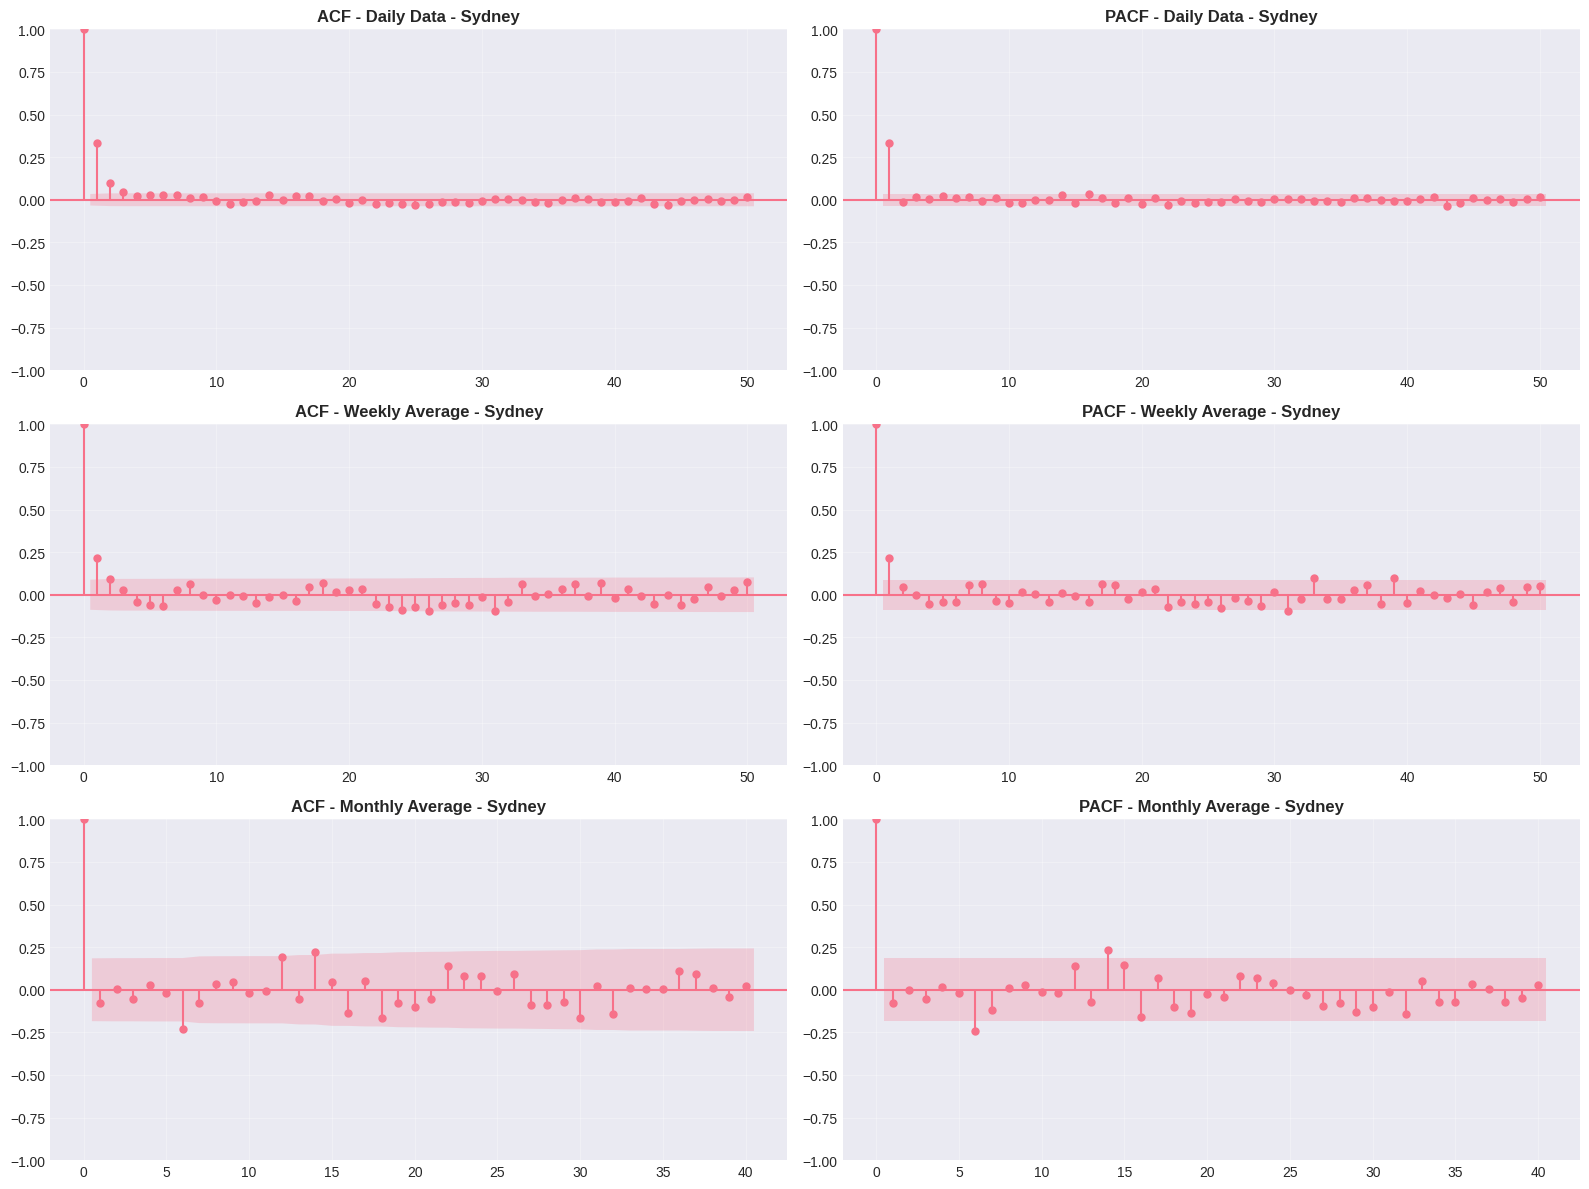

In [15]:
rainfall_daily = df_city['Rainfall'].fillna(method='ffill').fillna(method='bfill')

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

plot_acf(rainfall_daily.dropna(), lags=50, ax=axes[0, 0])
axes[0, 0].set_title(f'ACF - Daily Data - {CITY}', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

plot_pacf(rainfall_daily.dropna(), lags=50, ax=axes[0, 1])
axes[0, 1].set_title(f'PACF - Daily Data - {CITY}', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

rainfall_weekly = df_city['Rainfall'].resample('W').mean().fillna(method='ffill')
plot_acf(rainfall_weekly.dropna(), lags=50, ax=axes[1, 0])
axes[1, 0].set_title(f'ACF - Weekly Average - {CITY}', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

plot_pacf(rainfall_weekly.dropna(), lags=50, ax=axes[1, 1])
axes[1, 1].set_title(f'PACF - Weekly Average - {CITY}', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plot_acf(rainfall_monthly.dropna(), lags=40, ax=axes[2, 0])
axes[2, 0].set_title(f'ACF - Monthly Average - {CITY}', fontsize=12, fontweight='bold')
axes[2, 0].grid(True, alpha=0.3)

plot_pacf(rainfall_monthly.dropna(), lags=40, ax=axes[2, 1])
axes[2, 1].set_title(f'PACF - Monthly Average - {CITY}', fontsize=12, fontweight='bold')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_autocorrelation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
acf_values = acf(rainfall_daily.dropna(), nlags=40)
pacf_values = pacf(rainfall_daily.dropna(), nlags=40)

print("AUTOCORRELATION ANALYSIS SUMMARY")
print("="*60)
print("\nFirst 10 ACF values:")
for i in range(10):
    print(f"Lag {i}: {acf_values[i]:.4f}")

significant_lags = np.where(np.abs(acf_values[1:]) > 0.1)[0] + 1
print(f"\nSignificant lags in ACF (|r| > 0.1):")
print(f"Lags: {significant_lags[:20]}")

print("\nFirst 10 PACF values:")
for i in range(10):
    print(f"Lag {i}: {pacf_values[i]:.4f}")

AUTOCORRELATION ANALYSIS SUMMARY

First 10 ACF values:
Lag 0: 1.0000
Lag 1: 0.3320
Lag 2: 0.1009
Lag 3: 0.0470
Lag 4: 0.0224
Lag 5: 0.0275
Lag 6: 0.0258
Lag 7: 0.0270
Lag 8: 0.0083
Lag 9: 0.0141

Significant lags in ACF (|r| > 0.1):
Lags: [1 2]

First 10 PACF values:
Lag 0: 1.0000
Lag 1: 0.3321
Lag 2: -0.0104
Lag 3: 0.0187
Lag 4: 0.0024
Lag 5: 0.0205
Lag 6: 0.0110
Lag 7: 0.0150
Lag 8: -0.0080
Lag 9: 0.0132


### Lag Plots

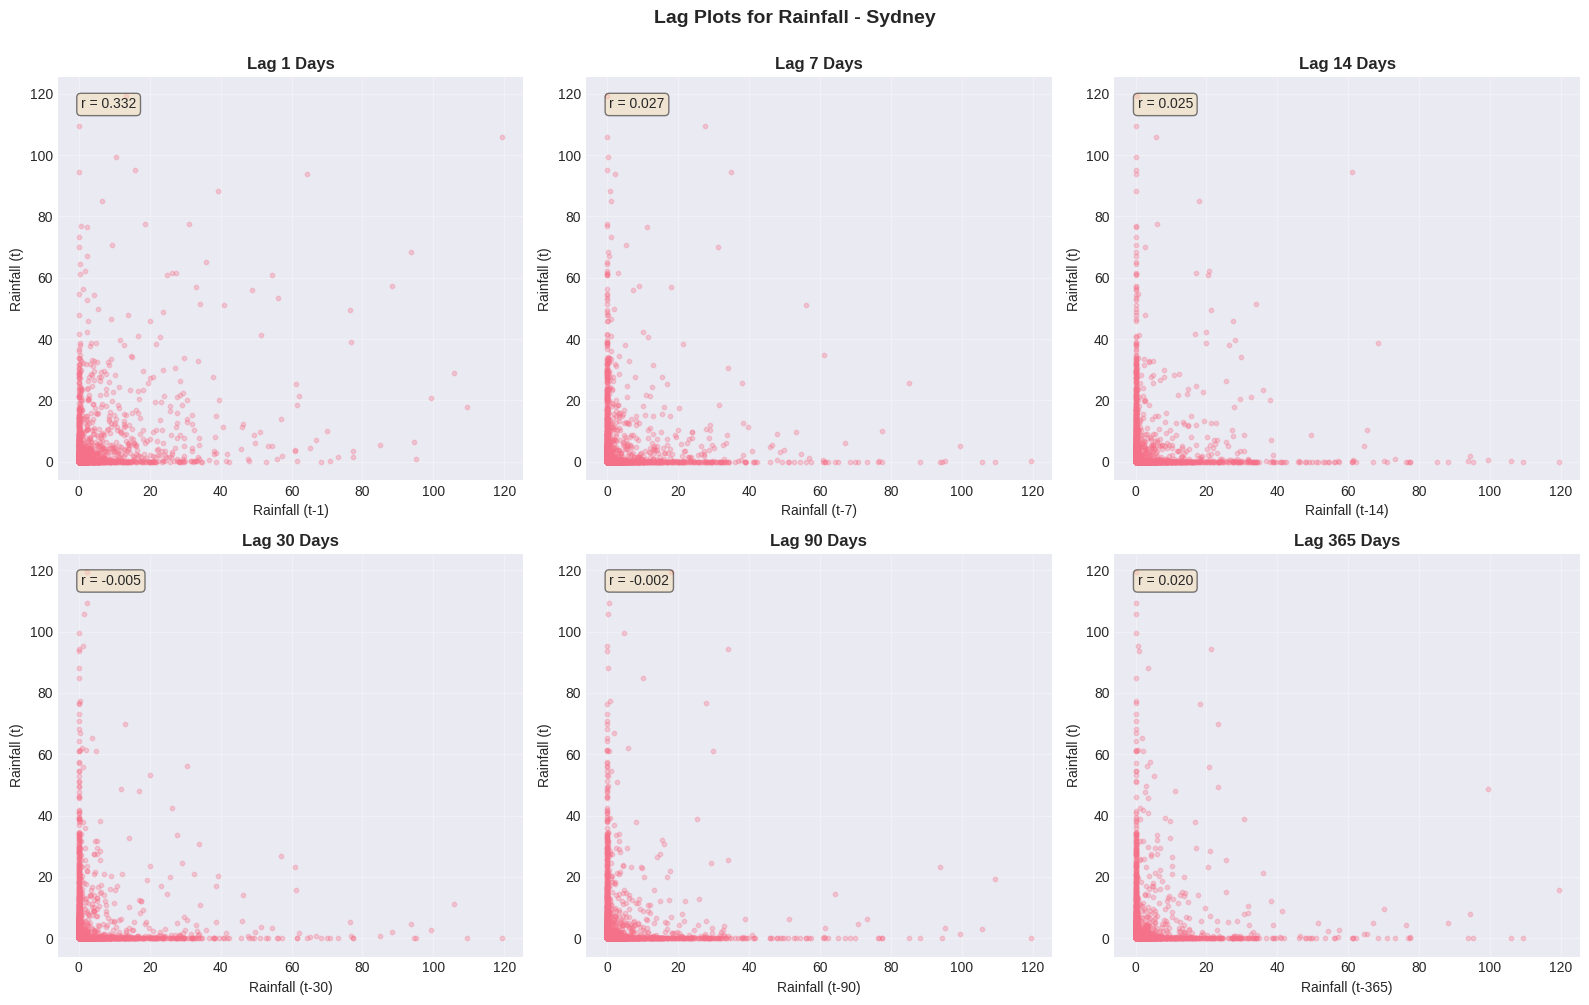

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
lags = [1, 7, 14, 30, 90, 365]

for idx, lag in enumerate(lags):
    row = idx // 3
    col = idx % 3

    data = pd.DataFrame({
        'rainfall': rainfall_daily,
        'rainfall_lag': rainfall_daily.shift(lag)
    }).dropna()

    axes[row, col].scatter(data['rainfall_lag'], data['rainfall'], alpha=0.3, s=10)
    axes[row, col].set_xlabel(f'Rainfall (t-{lag})')
    axes[row, col].set_ylabel('Rainfall (t)')
    axes[row, col].set_title(f'Lag {lag} Days', fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

    corr = data.corr().iloc[0, 1]
    axes[row, col].text(0.05, 0.95, f'r = {corr:.3f}',
                        transform=axes[row, col].transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle(f'Lag Plots for Rainfall - {CITY}', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(f'{CITY}_lag_plots.png', dpi=300, bbox_inches='tight')
plt.show()

---
# TASK 4: Data Partitioning Plan (0.5p)
---

In [18]:
total_days = len(df_city)
total_months = len(rainfall_monthly)

print("DATA OVERVIEW:")
print(f"Total data points (daily): {total_days}")
print(f"Total data points (monthly): {total_months}")
print(f"Date range: {df_city.index.min()} to {df_city.index.max()}")
print(f"Total years: {(df_city.index.max() - df_city.index.min()).days / 365.25:.2f}")

DATA OVERVIEW:
Total data points (daily): 3344
Total data points (monthly): 113
Date range: 2008-02-01 00:00:00 to 2017-06-25 00:00:00
Total years: 9.40


In [19]:
train_end_idx = int(0.70 * total_days)
val_end_idx = int(0.85 * total_days)

train_data = df_city.iloc[:train_end_idx]
val_data = df_city.iloc[train_end_idx:val_end_idx]
test_data = df_city.iloc[val_end_idx:]

print("TEMPORAL SPLIT (70% Train / 15% Validation / 15% Test):")
print(f"Training set:   {train_data.index.min()} to {train_data.index.max()} ({len(train_data)} days)")
print(f"Validation set: {val_data.index.min()} to {val_data.index.max()} ({len(val_data)} days)")
print(f"Test set:       {test_data.index.min()} to {test_data.index.max()} ({len(test_data)} days)")

TEMPORAL SPLIT (70% Train / 15% Validation / 15% Test):
Training set:   2008-02-01 00:00:00 to 2014-09-25 00:00:00 (2340 days)
Validation set: 2014-09-26 00:00:00 to 2016-02-09 00:00:00 (502 days)
Test set:       2016-02-10 00:00:00 to 2017-06-25 00:00:00 (502 days)


In [20]:
years = df_city.index.year.unique()
n_years = len(years)
train_years = int(0.70 * n_years)
val_years = int(0.85 * n_years)

train_year_end = sorted(years)[train_years - 1]
val_year_end = sorted(years)[val_years - 1]

print("YEAR-BASED SPLIT:")
print(f"Training years:   {years.min()} - {train_year_end}")
print(f"Validation years: {train_year_end + 1} - {val_year_end}")
print(f"Test years:       {val_year_end + 1} - {years.max()}")

YEAR-BASED SPLIT:
Training years:   2008 - 2014
Validation years: 2015 - 2015
Test years:       2016 - 2017


In [21]:
window_size = 365
horizon = 30
n_splits = 5

print("ROLLING WINDOW CROSS-VALIDATION:")
print(f"Window size: {window_size} days (1 year)")
print(f"Forecast horizon: {horizon} days")
print(f"Number of splits: {n_splits}")

ROLLING WINDOW CROSS-VALIDATION:
Window size: 365 days (1 year)
Forecast horizon: 30 days
Number of splits: 5


### Partitioning Visualization

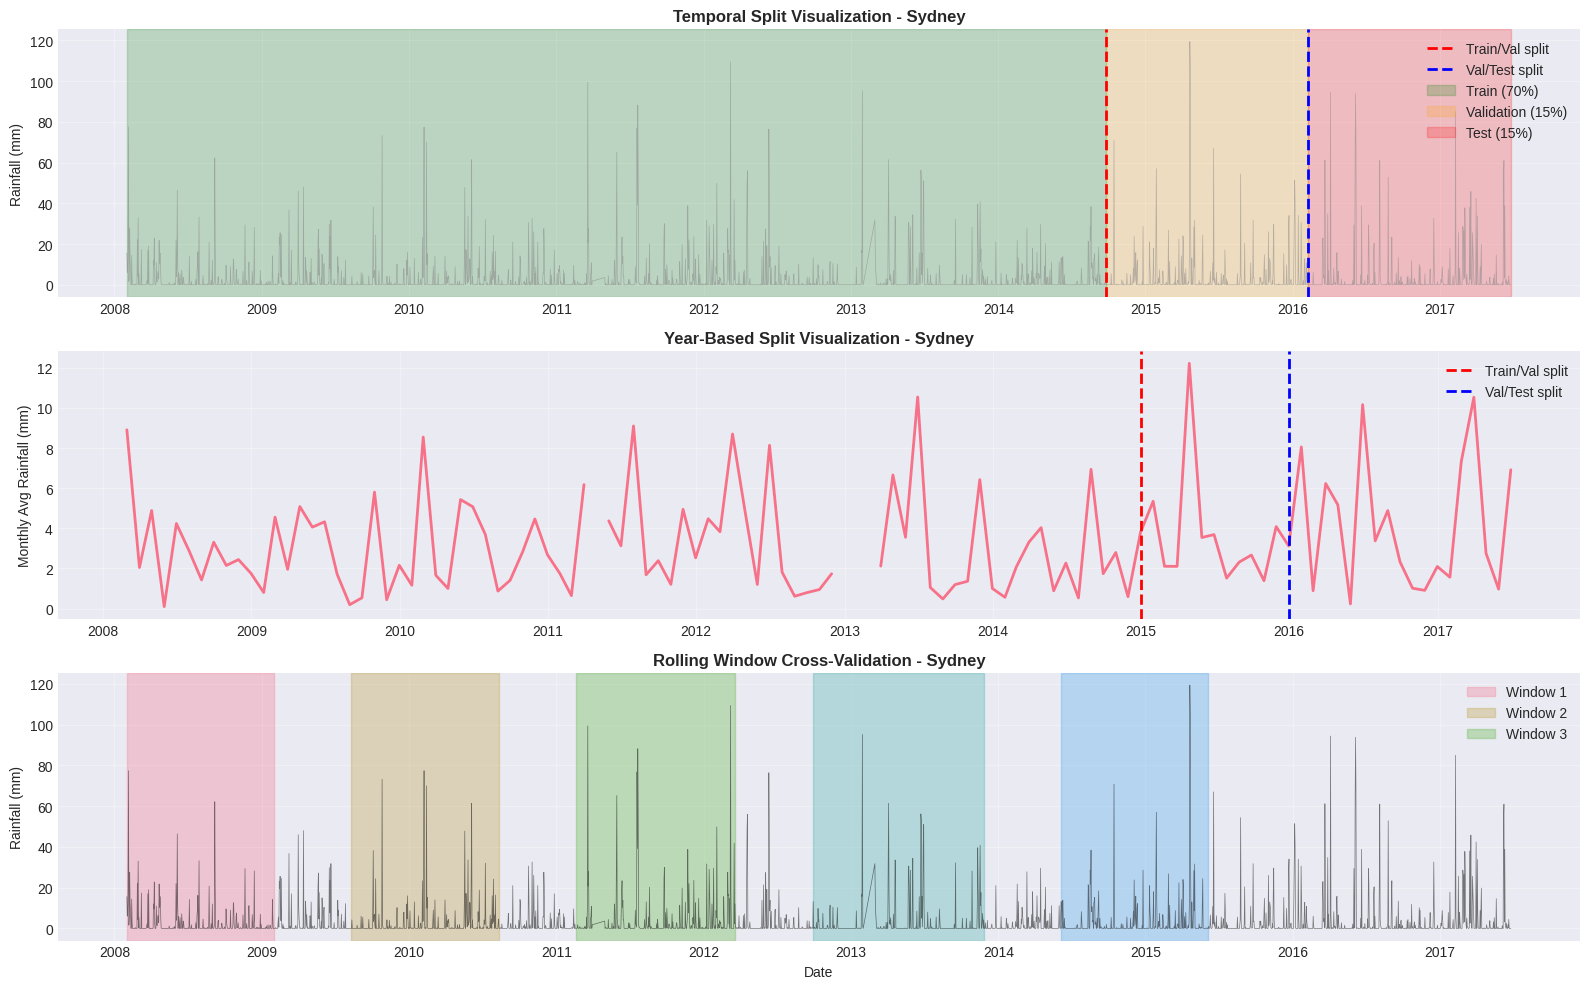

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

axes[0].plot(df_city.index, df_city['Rainfall'], linewidth=0.5, alpha=0.5, color='gray')
axes[0].axvline(x=train_data.index.max(), color='red', linestyle='--', linewidth=2, label='Train/Val split')
axes[0].axvline(x=val_data.index.max(), color='blue', linestyle='--', linewidth=2, label='Val/Test split')
axes[0].axvspan(df_city.index.min(), train_data.index.max(), alpha=0.2, color='green', label='Train (70%)')
axes[0].axvspan(train_data.index.max(), val_data.index.max(), alpha=0.2, color='orange', label='Validation (15%)')
axes[0].axvspan(val_data.index.max(), df_city.index.max(), alpha=0.2, color='red', label='Test (15%)')
axes[0].set_title(f'Temporal Split Visualization - {CITY}', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Rainfall (mm)')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

monthly_data = df_city['Rainfall'].resample('M').mean()
axes[1].plot(monthly_data.index, monthly_data, linewidth=2)
axes[1].axvline(x=pd.Timestamp(f'{train_year_end}-12-31'), color='red', linestyle='--',
                linewidth=2, label='Train/Val split')
axes[1].axvline(x=pd.Timestamp(f'{val_year_end}-12-31'), color='blue', linestyle='--',
                linewidth=2, label='Val/Test split')
axes[1].set_title(f'Year-Based Split Visualization - {CITY}', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Monthly Avg Rainfall (mm)')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

rainfall_for_rolling = df_city['Rainfall'].fillna(0)
step_size = len(rainfall_for_rolling) // (n_splits + 1)

for i in range(n_splits):
    start_idx = i * step_size
    train_end_idx = start_idx + window_size
    test_end_idx = min(train_end_idx + horizon, len(rainfall_for_rolling))

    if train_end_idx < len(rainfall_for_rolling):
        train_start = df_city.index[start_idx]
        train_end = df_city.index[min(train_end_idx, len(df_city)-1)]
        axes[2].axvspan(train_start, train_end, alpha=0.3, color=f'C{i}',
                        label=f'Window {i+1}' if i < 3 else '')

axes[2].plot(df_city.index, rainfall_for_rolling, linewidth=0.5, alpha=0.5, color='black')
axes[2].set_title(f'Rolling Window Cross-Validation - {CITY}', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Rainfall (mm)')
axes[2].set_xlabel('Date')
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_partitioning_strategy.png', dpi=300, bbox_inches='tight')
plt.show()

### Recommended Partitioning Approach

**Method:** Temporal Split

**Rationale:**
1. Preserves temporal ordering (critical for time series)
2. Prevents data leakage from future to past
3. Simulates real-world forecasting scenario

**Implementation:**
- Training Set (70%): Build and train models
- Validation Set (15%): Hyperparameter tuning, model selection
- Test Set (15%): Final performance evaluation

**Additional Validation:**
- Use rolling window cross-validation for robust evaluation
- Ensures model performs well across different time periods
- Helps detect overfitting to specific time periods

In [23]:
train_data.to_csv(f'{CITY}_train_data.csv')
val_data.to_csv(f'{CITY}_val_data.csv')
test_data.to_csv(f'{CITY}_test_data.csv')

print(" Data saved successfully!")
print(f"\nFiles created:")
print(f"  - {CITY}_train_data.csv")
print(f"  - {CITY}_val_data.csv")
print(f"  - {CITY}_test_data.csv")

✓ Data saved successfully!

Files created:
  - Sydney_train_data.csv
  - Sydney_val_data.csv
  - Sydney_test_data.csv
